### EDA

In [1]:
#importing pandas library
import pandas as pd

#loading data
train = pd.read_csv('train.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking the NULL Values

In [2]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Graphical Analysis

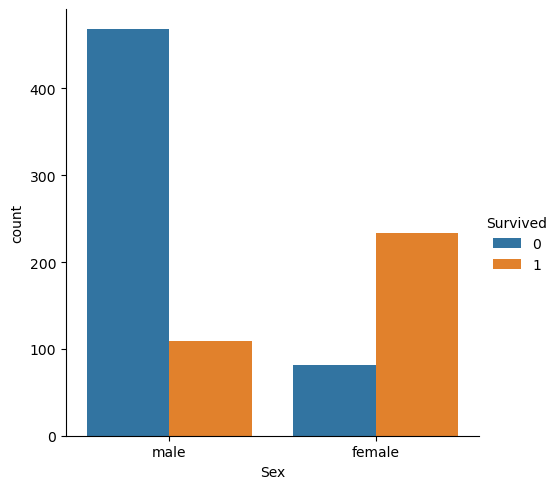

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot
sns.catplot(x='Sex', hue='Survived',
            kind='count', data = train)

### Pclass (Ordinal Feature) vs Survived

<Axes: xlabel='Survived', ylabel='Pclass'>

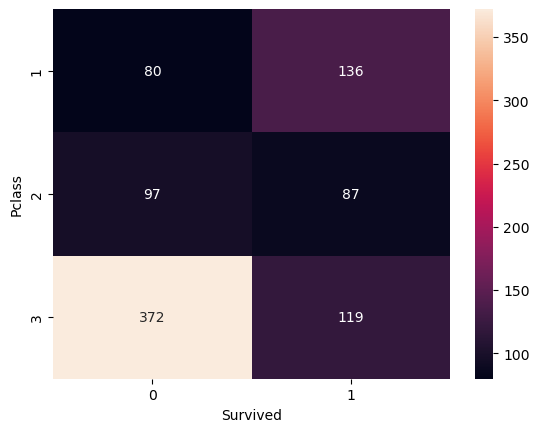

In [4]:
# Group the dataset by Pclass and Survived and then unstack them
group = train.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

# Heatmap - Color encoded 2D representation of data
sns.heatmap(pclass_survived, annot = True, fmt = 'd')

### Age (Continuous Feature) vs Survived

<Axes: xlabel='Sex', ylabel='Age'>

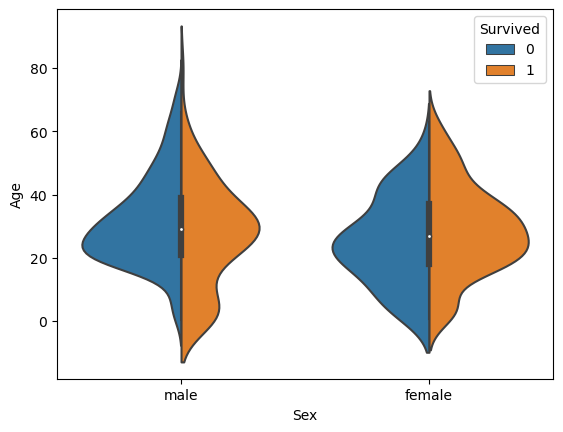

In [5]:
# Violinplot Displays distribution of data
# across all levels of a category
sns.violinplot(x='Sex', y='Age', hue='Survived',
               data= train, split= True)

The survival rate is:

- Good for children.
- High for women in the age range 20-50.
- Less for men as the age increases.

### Factor plot for Family_Size (Count Feature) and Family Size

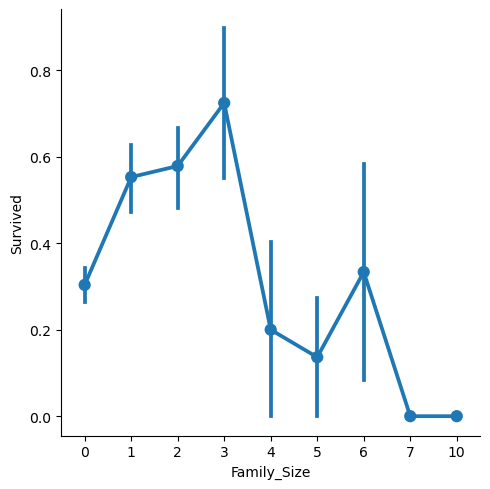

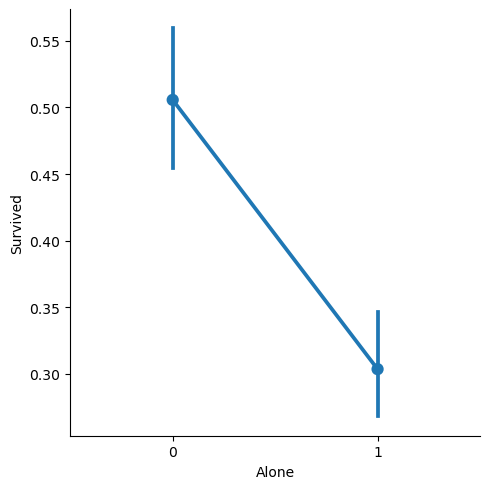

In [6]:
# Adding a column Family_Size
train['Family_Size'] = 0
train['Family_Size'] = train['Parch'] + train['SibSp']

# Adding a column Alone
train['Alone'] = 0
train.loc[train.Family_Size == 0, 'Alone'] = 1

# Factorplot for Family_Size
sns.catplot(x= 'Family_Size', y= 'Survived', data = train, kind= 'point')

# Factorplot for Alone
sns.catplot(x='Alone', y='Survived', data = train, kind= 'point')

Important observations:

- If a passenger is alone, the survival rate is less.
- If the family size is greater than 5, chances of survival decrease considerably.

### Bar Plot for Fare (Continuous Feature)

<Axes: xlabel='Fare_Range', ylabel='Survived'>

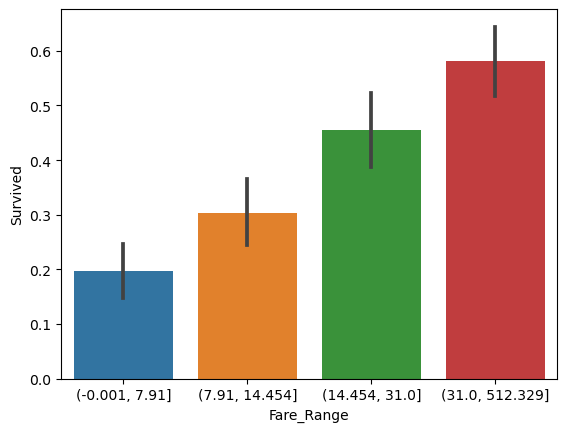

In [7]:
# Divide Fare into 4 bins
train['Fare_Range'] = pd.qcut(train['Fare'], 4)

# Barplot - Shows approximate values based on the height of bars
sns.barplot(x= 'Fare_Range', y= 'Survived',
            data = train)

### Categorical Count Plots for Embarked Feature

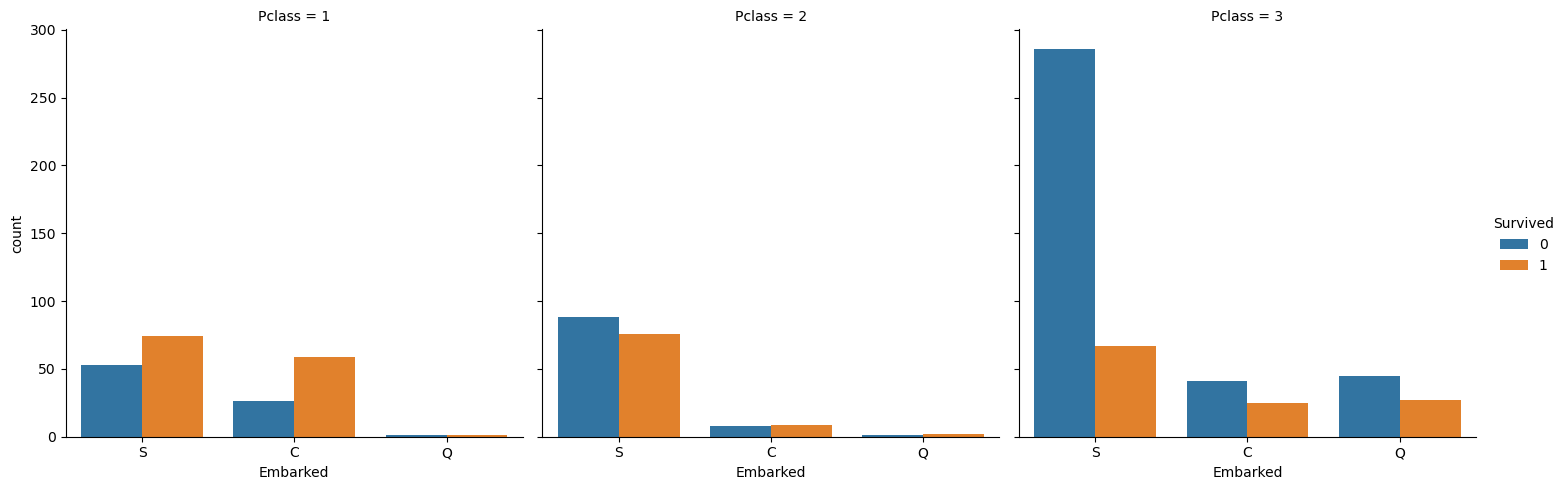

In [8]:
# Countplot
sns.catplot(x= 'Embarked', hue= 'Survived',
            kind= 'count', col= 'Pclass', data = train)

Some notable observations are:

- Majority of the passengers boarded from S. So, the missing values can be filled with S
- Majority of class 3 passengers boarded from Q
- S looks lucky for class 1 and 2 passengers compared to class 3

Conclusion :

- The columns that can be dropped are:
- PassengerId, Name, Ticket, Cabin: They are strings, cannot be categorized and don’t contribute much to the outcome.
- Age, Fare: Instead, the respective range columns are retained.
- The titanic data can be analyzed using many more graph techniques and also more column correlations, than, as described in this article.
- Once the EDA is completed, the resultant dataset can be used for predictions.

### Importing Libraries

In [9]:
import warnings
import numpy as np
plt.style.use('fivethirtyeight')
%matplotlib inline
warnings.filterwarnings('ignore')

In [11]:
test = pd.read_csv('test.csv')

# To know number of columns and rows
train.shape

(891, 15)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Family_Size  891 non-null    int64   
 13  Alone        891 non-null    int64   
 14  Fare_Range   891 non-null    category
dtypes: category(1), float64(2), int64(7), object(5)
memory usage: 98.7+ KB


In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_Size      0
Alone            0
Fare_Range       0
dtype: int64

### Visualization

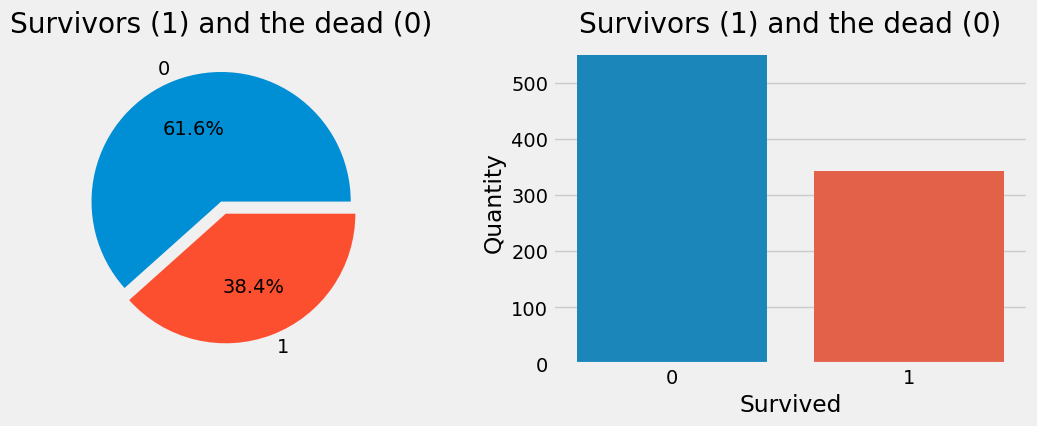

In [23]:
f, ax = plt.subplots(1,2, figsize=(12,4))
train['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survivors (1) and the dead (0)')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data = train, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivors (1) and the dead (0)')
plt.show()

Sex Feature

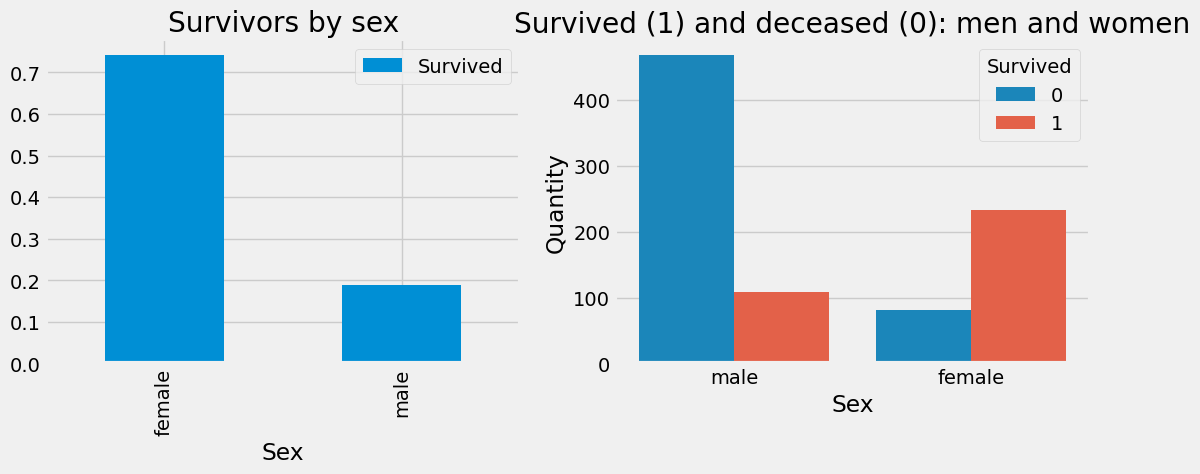

In [29]:
f, ax = plt.subplots(1,2, figsize=(12,4))
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivors by sex')
sns.countplot(x='Sex', hue= 'Survived', data= train, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survived (1) and deceased (0): men and women')
plt.show()

### Feature Engineering